## Domain knowledge discretisation

Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. Typical examples are the discretisation of variables like Age and Income. 

Income for example is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per Age, it is usually divided in certain groups according to the business need, for example division into  0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.

## In this demo

We will learn how to divide a variable into pre-defined buckets using the titanic and loan book datasets.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# load the Titanic Dataset

data = pd.read_csv('../titanic.csv',
                   usecols=['age', 'survived'])

data.head()

,survived,age
0,1,29.0000
1,1,0.9167
2,0,2.0000
3,0,30.0000
4,0,25.0000


The variable Age contains missing data, that I will fill by extracting a random sample of the variable.

In [3]:
def impute_na(data, variable):
    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = data[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [4]:
# let's fill the missing data
data['age'] = impute_na(data, 'age')

In [5]:
# let's divide Age into the buckets that we described in the intro cell
# of this notebook

# bucket boundaries
buckets = [0, 20, 40, 60, 1000]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
data['Age_buckets_labels'] = pd.cut(
    data['age'], bins=buckets, labels=labels, include_lowest=True)

data['Age_buckets'] = pd.cut(data['age'], bins=buckets, include_lowest=True)

data.head()

,survived,age,Age_buckets_labels,Age_buckets
0,1,29.0000,20-40,"(20.0, 40.0]"
1,1,0.9167,0-20,"(-0.001, 20.0]"
2,0,2.0000,0-20,"(-0.001, 20.0]"
3,0,30.0000,20-40,"(20.0, 40.0]"
4,0,25.0000,20-40,"(20.0, 40.0]"


In [6]:
data.tail()

,survived,age,Age_buckets_labels,Age_buckets
1304,0,14.5,0-20,"(-0.001, 20.0]"
1305,0,39.0,20-40,"(20.0, 40.0]"
1306,0,26.5,20-40,"(20.0, 40.0]"
1307,0,27.0,20-40,"(20.0, 40.0]"
1308,0,29.0,20-40,"(20.0, 40.0]"


Above we can observe the buckets into which each Age observation was placed. For example, age 14 was placed into the 0-20 bucket.

Let's explore the number of observations and survival rate per bucket after this arbitrary discretisation method.

<AxesSubplot: xlabel='Age_buckets_labels'>

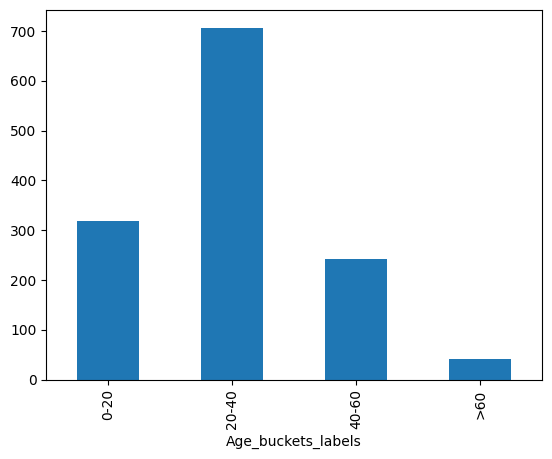

In [7]:
# number of passengers per age bucket

data.groupby('Age_buckets_labels')['age'].count().plot.bar()

<AxesSubplot: xlabel='Age_buckets_labels'>

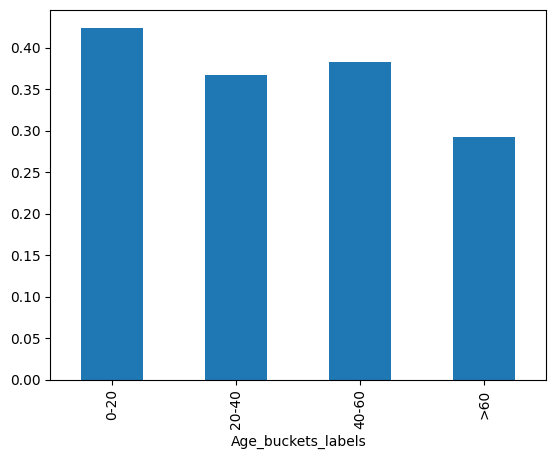

In [8]:
# survival rate per age bucket

data.groupby('Age_buckets_labels')['survived'].mean().plot.bar()

### Peer to peer

Let's explore discretisation using domain knowledge in a different business scenario. I will use the loan book from the peer to peer lending company. This dataset contains information on loans given to people, and the financial characteristics of those people as well as the loan performance.

In [9]:
# I will load only the income declared by the borrower for the demonstration

data = pd.read_csv('../loan.csv', usecols=['income'])

data.head()

,income
0,84600.0
1,102000.0
2,69840.0
3,100386.0
4,95040.0


In [10]:
data['income'].describe()

count    1.000000e+04
mean     7.157229e+04
std      5.286105e+04
min      0.000000e+00
25%      4.365000e+04
50%      6.045000e+04
75%      8.536000e+04
max      2.185000e+06
Name: income, dtype: float64

<AxesSubplot: >

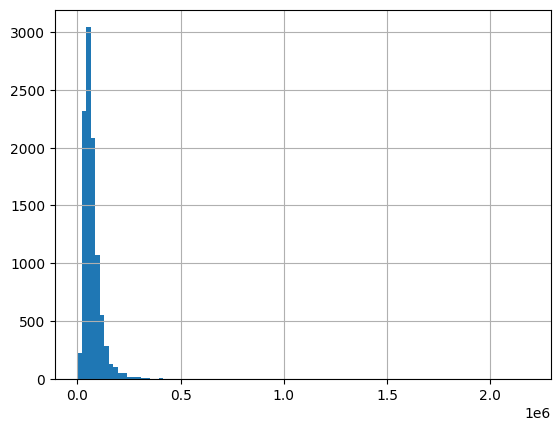

In [11]:
# let's inspect the distribution of Incomes

data['income'].hist(bins=100)

<AxesSubplot: >

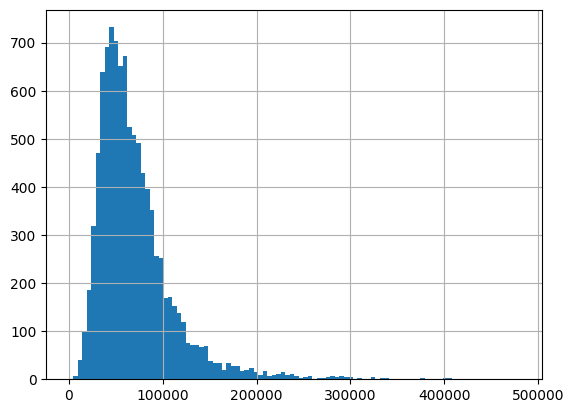

In [12]:
# and now let's look at the lower incomes in more detail

data[data['income']<500000]['income'].hist(bins=100)

We can see that the majority of the population earns below 150,000. So we may want to make a cap there.

In [13]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [0, 45000, 65000, 90000, 150000, 1e10]

# bucket labels
labels = ['0-45k', '45-65k', '65-90k', '90-150k', '>150k']

# discretisation
data['Income_buckets'] = pd.cut(
    data['income'], bins=buckets, labels=labels, include_lowest=True)

data.head()

,income,Income_buckets
0,84600.0,65-90k
1,102000.0,90-150k
2,69840.0,65-90k
3,100386.0,90-150k
4,95040.0,90-150k


In [14]:
data.tail()

,income,Income_buckets
9995,98000.0,90-150k
9996,36270.0,0-45k
9997,52250.0,45-65k
9998,80040.0,65-90k
9999,72000.0,65-90k


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-45k'),
  Text(1, 0, '45-65k'),
  Text(2, 0, '65-90k'),
  Text(3, 0, '90-150k'),
  Text(4, 0, '>150k')])

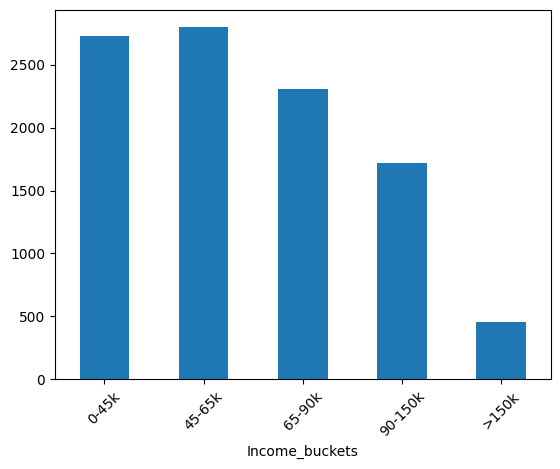

In [15]:
data.groupby(['Income_buckets'])['income'].count().plot.bar()
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-45k'),
  Text(1, 0, '45-65k'),
  Text(2, 0, '65-90k'),
  Text(3, 0, '90-150k'),
  Text(4, 0, '>150k')])

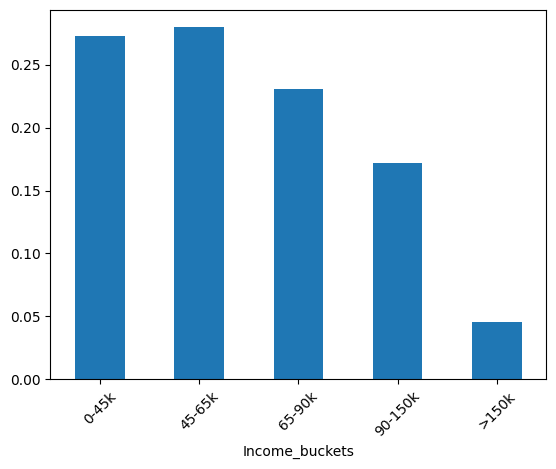

In [16]:
(data.groupby(['Income_buckets'])['income'].count()/len(data)).plot.bar()
plt.xticks(rotation=45)

We  have captured ~equal amount of borrowers in each of the first 3 buckets, and we see clearly, that a smaller percentage of the loans were disbursed to high earners.

**Note**

We can perform arbitrary discretisation with Feature-engine, with the ArbitraryDiscretiser class. Here you can find [an example](https://github.com/solegalli/feature_engine/blob/master/examples/discretisation/ArbitraryDiscretiser.ipynb)

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**